Dataset utilizzato: [Brain Tumor](https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor)


# Analisi del dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/drive/')
plt.style.use('ggplot')

Mounted at /content/drive/


In [ ]:
path_to_dataset = "/content/drive/MyDrive/BrainTumor/Brain Tumor.csv"

Lettura del dataset

In [ ]:
dataset = pd.read_csv(path_to_dataset, index_col=0)
dataset.head()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
Image,,,,,,,,,,,,,,
Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


Dimensioni del dataset

In [ ]:
dataset.shape

(3762, 14)

## Preprocessing del dataset

Controllo sui tipi delle colonne

In [ ]:
dataset.dtypes

Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

Trasformo la variabile target in una variabile categorica

In [ ]:
dataset["Class"] = dataset["Class"].astype("category")
dataset.dtypes

Class                 category
Mean                   float64
Variance               float64
Standard Deviation     float64
Entropy                float64
Skewness               float64
Kurtosis               float64
Contrast               float64
Energy                 float64
ASM                    float64
Homogeneity            float64
Dissimilarity          float64
Correlation            float64
Coarseness             float64
dtype: object

Controllo la presenza di eventuali valori nulli

In [ ]:
dataset.isnull().sum()

Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

Calcolo delle statistiche descrittive sul dataset

In [ ]:
dataset.describe()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


Dato che l'attributo `Coarseness` assume valori molto piccoli, applichiamo una trasformazione logaritmica.



In [ ]:
import numpy as np

In [ ]:
dataset['Coarseness'] = np.log10(dataset['Coarseness'])

In [ ]:
dataset

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
Image,,,,,,,,,,,,,,
Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,-154.127358
Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,-154.127358
Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,-154.127358
Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,-154.127358
Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,-154.127358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,-154.127358
Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,-154.127358
Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,-154.127358


Calcolo della correlazione tra i vari attributi

<ipython-input-12-4f727637b1b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True);


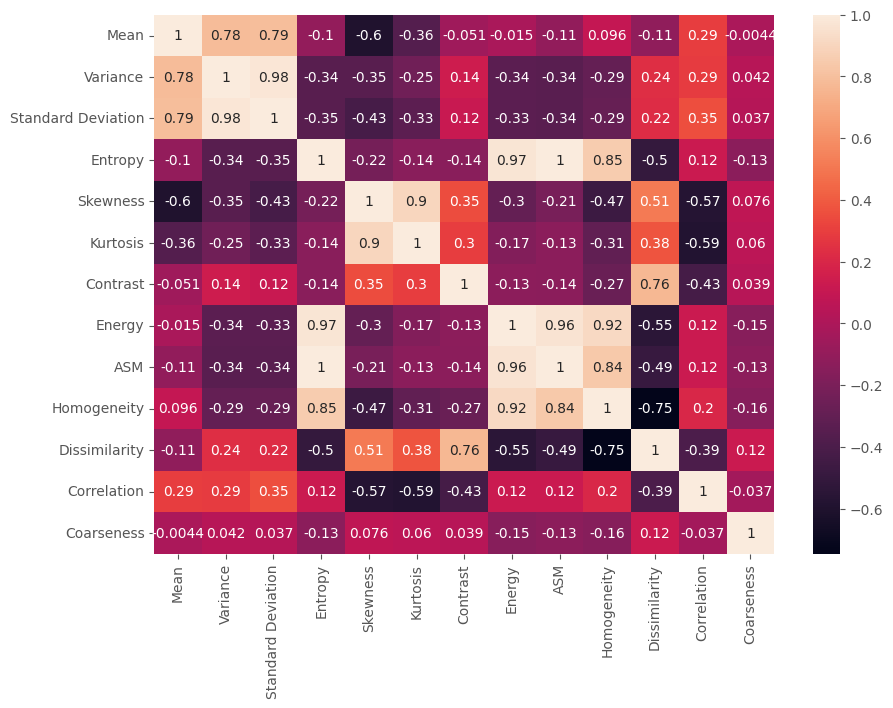

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(dataset.corr(), annot=True);

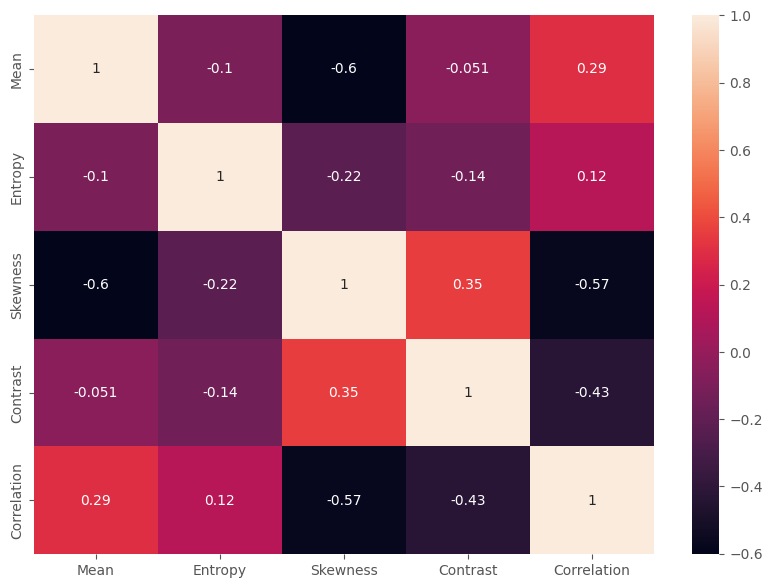

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(dataset.loc[:, ~dataset.columns.isin(['Image', 'Class', 'Variance', 'Standard Deviation', 'Energy', 'ASM', 'Homogeneity', 'Kurtosis', 'Dissimilarity', 'Coarseness'])].corr(), annot=True);

### Analisi dell'attributo target

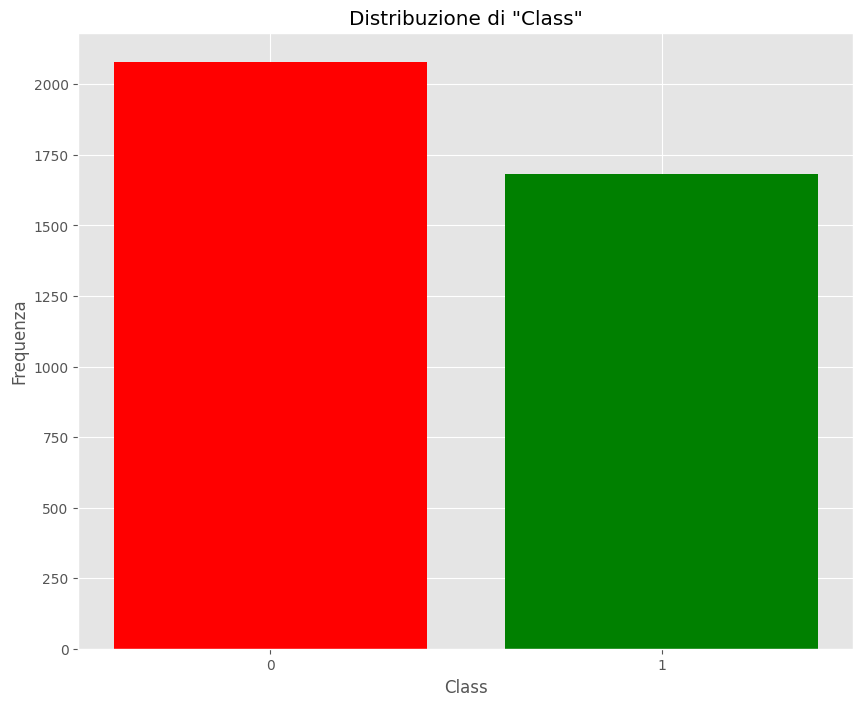

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(dataset["Class"].unique(), dataset["Class"].value_counts(),
        color=["red", "green"], tick_label=["0", "1"])
plt.xlabel("Class")
plt.ylabel("Frequenza")
plt.title("Distribuzione di \"Class\"")
plt.show()

### Analisi degli attributi

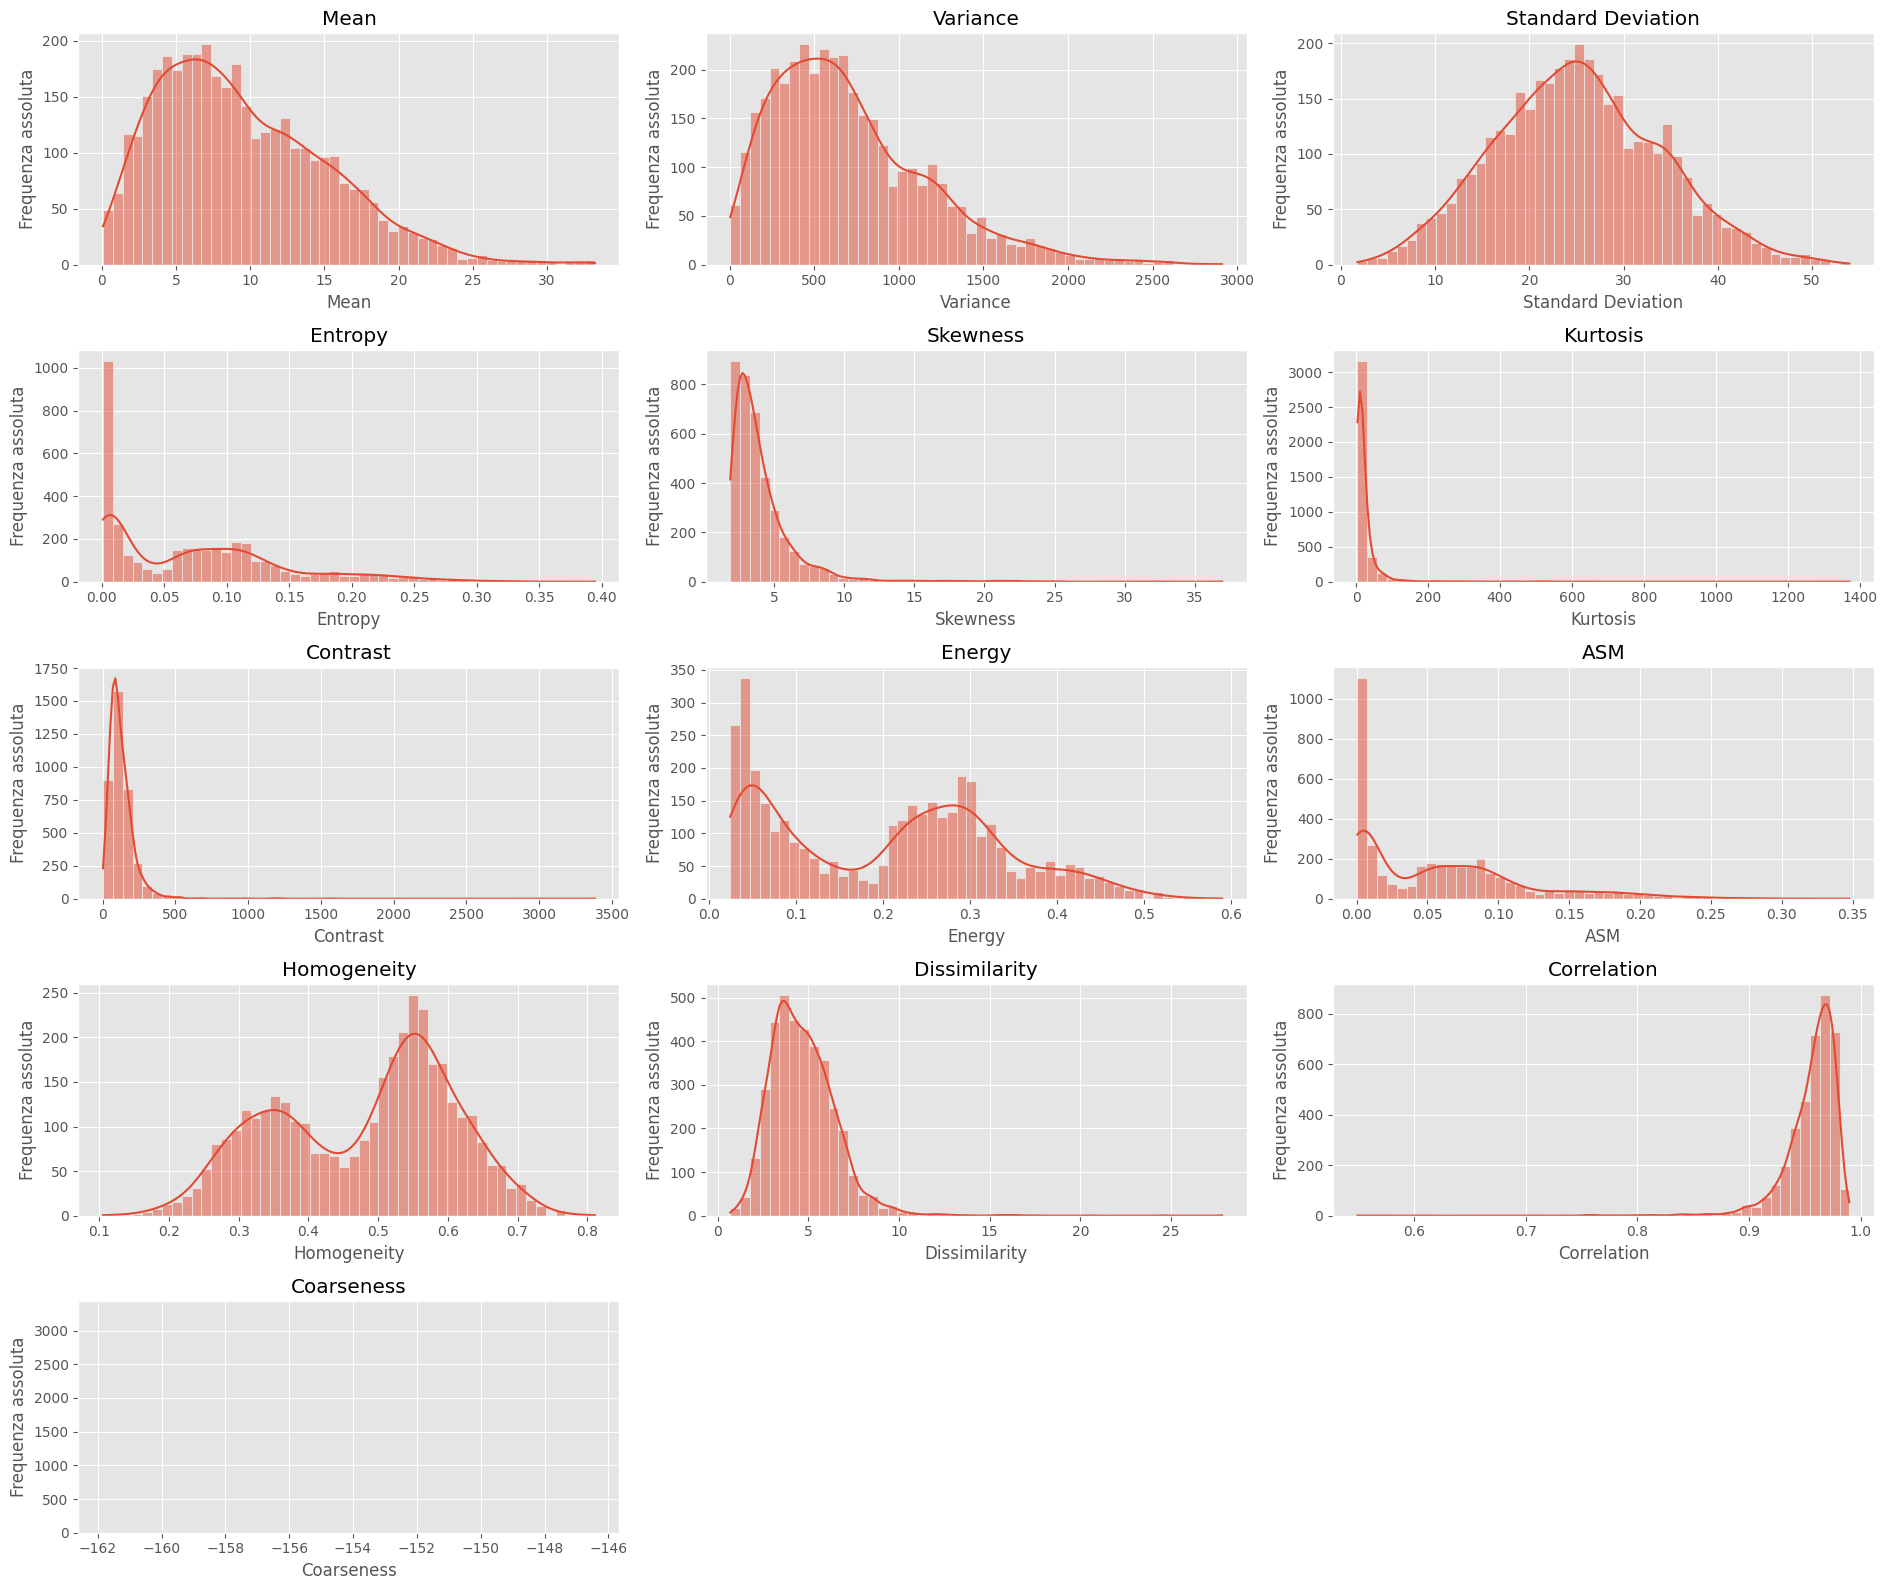

In [ ]:
num_rows = 5
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(19, 16))

axs = axs.flatten()

i = 0

for col_name in dataset.columns[1:]:
    sns.histplot(dataset[col_name], bins=50, ax=axs[i], kde=True);
    axs[i].set_xlabel(col_name)
    axs[i].set_ylabel("Frequenza assoluta")
    axs[i].set_title(col_name)

    i = i + 1

for j in range(13, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()

plt.show();

Calcolo dei box plot per gli attributi

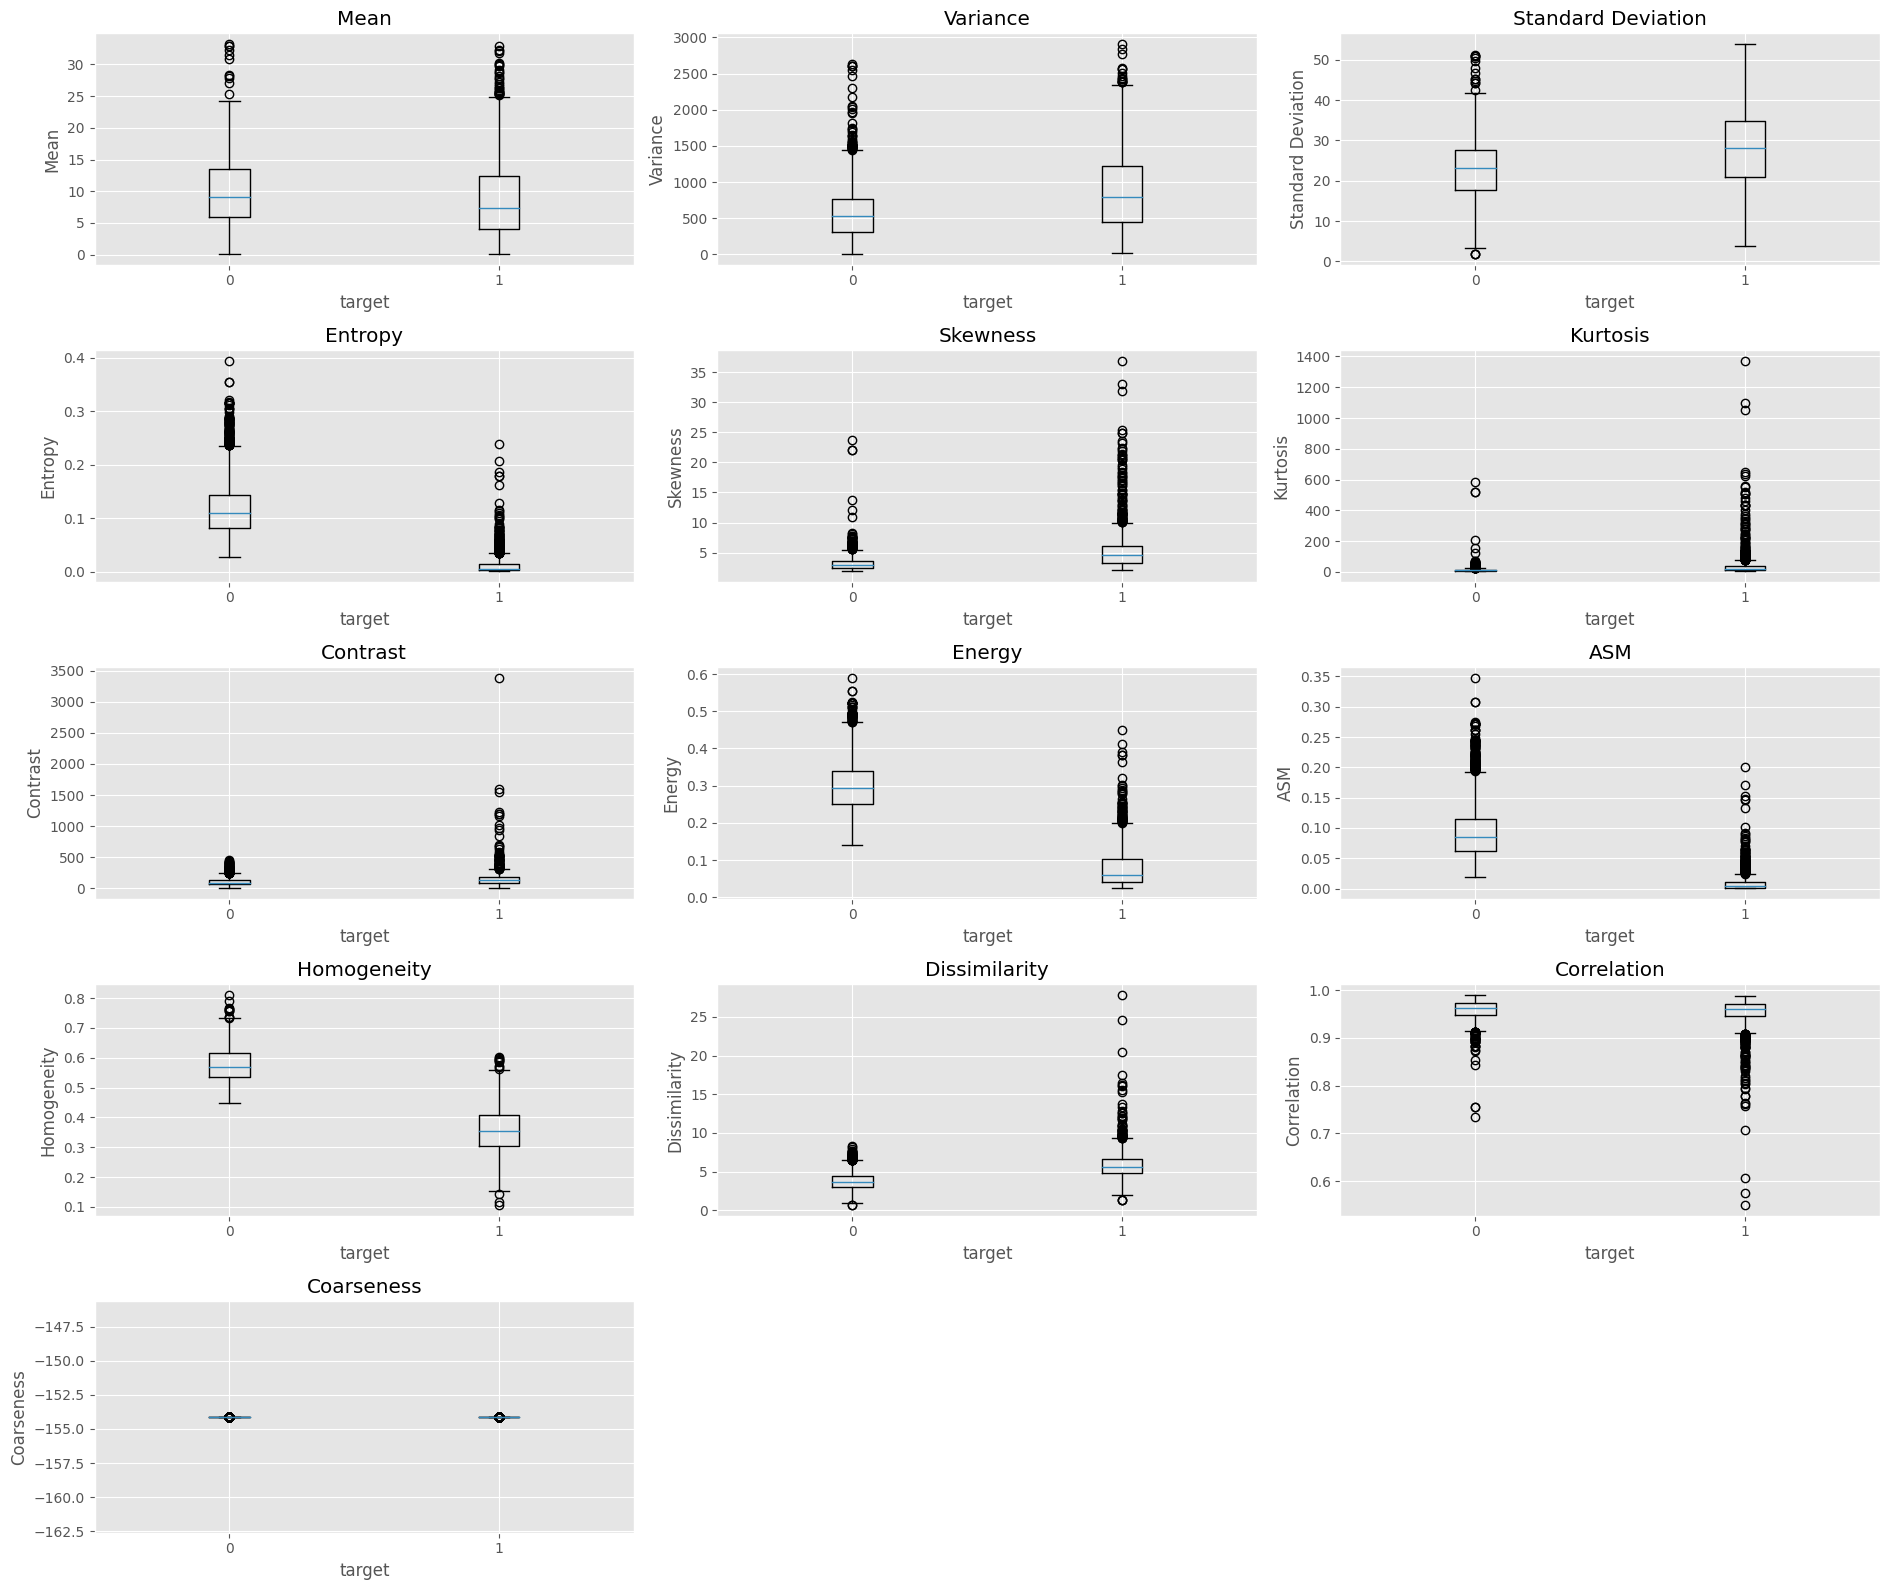

In [ ]:
num_rows = 5
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(19, 16))

axs = axs.flatten()

i = 0

for col_name in dataset.columns[1:]:
    data_to_plot = {
        '0': dataset[dataset['Class'] == 0][col_name],
        '1': dataset[dataset['Class'] == 1][col_name],
    }

    axs[i].boxplot(data_to_plot.values())
    axs[i].set_xticklabels(data_to_plot.keys())
    axs[i].set_ylabel(col_name)
    axs[i].set_xlabel('target')
    axs[i].set_title(col_name)
    i = i + 1

for j in range(13, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()

plt.show()

Tracciamo un grafico per analizzare la distribuzione delle classi, in base alle varie features. Il numero totale di grafici è: $$\binom{13}{2} = 78$$

In [ ]:
from itertools import combinations

In [ ]:
features = dataset.columns[1:]
couples = list(combinations(features, 2))

num_rows = len(couples)
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(19, 350))

axs = axs.flatten()

i = 0

for couple in couples:
    sns.scatterplot(x=couple[0], y=couple[1], hue="Class", data=dataset,
                    ax=axs[i], palette=["red", "green"])
    axs[i].set_title(couple[0] + " x " + couple[1])

    data_to_plot = {
        '0': dataset[dataset['Class'] == 0],
        '1': dataset[dataset['Class'] == 1],
    }

    i = i + 1
    sns.scatterplot(x=couple[0], y=couple[1], hue="Class", data=data_to_plot["0"],
                    ax=axs[i], palette=["red", "green"])
    axs[i].set_title(couple[0] + " x " + couple[1])

    i = i + 1
    sns.scatterplot(x=couple[0], y=couple[1], hue="Class", data=data_to_plot["1"],
                    ax=axs[i], palette=["red", "green"])
    axs[i].set_title(couple[0] + " x " + couple[1])

    i = i + 1


plt.tight_layout()
plt.show()

# Preprocessing del dataset

## Suddivisione dataset

In [ ]:
dataset_post_analisi = dataset[['Mean', 'Entropy', 'Skewness', 'Contrast', 'Correlation', 'Class']]

dataset_post_analisi.head()

,Mean,Entropy,Skewness,Contrast,Correlation,Class
Image,,,,,,
Image1,6.535339,0.109059,4.276477,98.613971,0.981939,0
Image2,8.749969,0.266538,3.718116,63.858816,0.988834,0
Image3,7.341095,0.001467,5.061750,81.867206,0.978014,1
Image4,5.958145,0.001477,5.677977,151.229741,0.964189,1
Image5,7.315231,0.146761,4.283221,174.988756,0.972789,0


In [ ]:
y = dataset_post_analisi['Class']
X = dataset_post_analisi.drop(['Class'], axis=1)

columns_name = X.columns

Per la rete neurale e per la SVM è necessario standardizzare i dati

In [ ]:
from sklearn.preprocessing import StandardScaler

Suddividiamo ora i dati in Train e Test, abbiamo scelto di utilizzare l'80% dei
dati per il training e il restante 20% per il test.

In [ ]:
scaler = StandardScaler()

X_scaled = pd.DataFrame()

X_scaled[columns_name] = scaler.fit_transform(X)
X_scaled = X_scaled.set_index(X.index)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

X_train.head()

,Mean,Entropy,Skewness,Contrast,Correlation
Image,,,,,
Image1439,9.691711,0.014755,4.145413,111.108108,0.980092
Image3165,2.142319,0.096746,4.610302,34.353992,0.948827
Image2317,8.229340,0.206584,3.294635,74.183124,0.978915
Image1825,5.757904,0.001252,5.415845,75.807265,0.972684
Image124,4.593552,0.001751,5.305935,92.420052,0.970507


In [ ]:
X_train_scaled.head()

,Mean,Entropy,Skewness,Contrast,Correlation
Image,,,,,
Image1439,0.035413,-0.837577,0.016670,-0.153933,0.930083
Image3165,-1.282737,0.329399,0.198225,-0.854979,-0.265362
Image2317,-0.219922,1.892724,-0.315587,-0.491193,0.885115
Image1825,-0.651443,-1.029762,0.512817,-0.476359,0.646845
Image124,-0.854743,-1.022669,0.469893,-0.324623,0.563608


Per evitare di introdurre errori nell'addestramento della rete abbiamo voluto
verificare che il dataset dopo lo split fosse ancora bilanciato

In [ ]:
print("Dataset:\n\t-Negative", round((y.value_counts()[0]/y.shape[0]) * 100, 2),
      "%\n\t-Positive", round((y.value_counts()[1]/y.shape[0]) * 100, 2), "%")
print("Train data:\n\t- Negative", round((y_train.value_counts()[0] / y_train.shape[0]) * 100, 2),
      "%\n\t- Positive", round((y_train.value_counts()[1] / y_train.shape[0]) * 100, 2), "%")

Dataset:
	-Negative 55.26 %
	-Positive 44.74 %
Train data:
	- Negative 55.27 %
	- Positive 44.73 %


## Analisi del dataset con PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
dataset_class = dataset['Class']
dataset_without_class = dataset.drop(['Class'], axis=1)

Standardizziamo il dataset

In [ ]:
scaled_data = scaler.fit_transform(dataset_without_class)

Crea un grafico della varianza spiegata per ogni componente

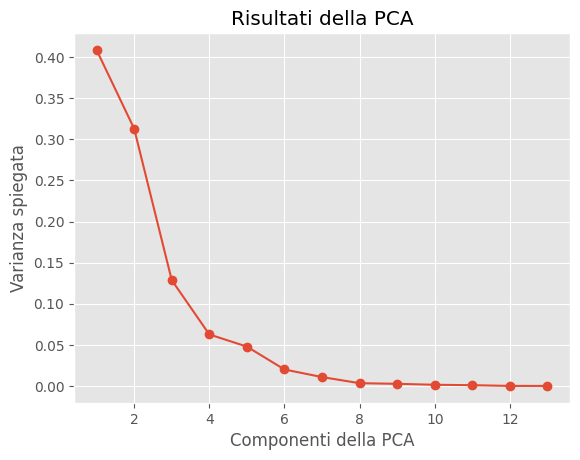

In [ ]:
pca = PCA().fit(scaled_data)

plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

Applica la PCA per ridurre la dimensionalità dei dati

In [ ]:
pca = PCA().fit(scaled_data)
pca_data = pca.transform(scaled_data)

print(pca.explained_variance_ratio_)
n_componenti = 3
print('Numero di componenti che spiegano la varianza: ' + str(n_componenti))
print('Varianza totale spiegata: ' + str(np.sum(pca.explained_variance_ratio_[:n_componenti])))

[4.08816773e-01 3.12991477e-01 1.28742637e-01 6.26484623e-02
 4.78447253e-02 2.00054187e-02 1.07659606e-02 3.34276945e-03
 2.55305629e-03 1.39156675e-03 8.91780975e-04 5.37250098e-06
 2.96819414e-29]
Numero di componenti che spiegano la varianza: 3
Varianza totale spiegata: 0.8505508871084848


Dal momento che la varianzia spiegata dalle prime 3 componenti allora consideriamo solo quelle.

In [ ]:
dataset_pca_transformed = pd.DataFrame(pca_data[:,:n_componenti])
dataset_pca_transformed.columns = ['PCA_C1', 'PCA_C2', 'PCA_C3']
dataset_pca_transformed = dataset_pca_transformed.set_index(dataset_class.index)
dataset_pca_transformed['Class'] = dataset_class
dataset_pca_transformed.head()

,PCA_C1,PCA_C2,PCA_C3,Class
Image,,,,
Image1,-1.134947,0.116539,-0.122074,0
Image2,-4.262143,-0.049437,1.500706,0
Image3,2.481383,-1.111446,-0.957833,1
Image4,3.074085,-0.235259,-0.388747,1
Image5,-0.900927,0.311275,1.345354,0


In [ ]:
import mpl_toolkits.mplot3d

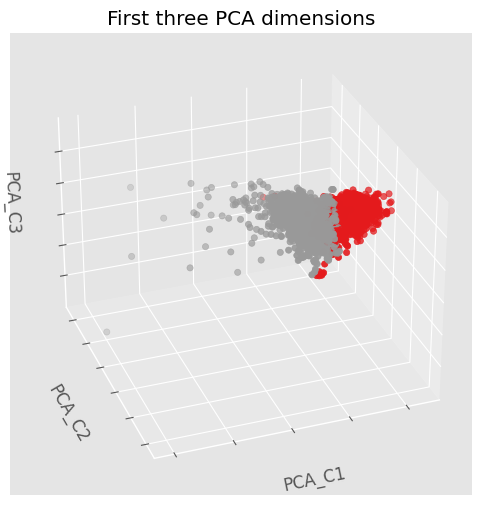

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    pca_data[:, 0],
    pca_data[:, 1],
    pca_data[:, 2],
    c=dataset_class,
    cmap='Set1'
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel(dataset_pca_transformed.columns[0])
ax.xaxis.set_ticklabels([])
ax.set_ylabel(dataset_pca_transformed.columns[1])
ax.yaxis.set_ticklabels([])
ax.set_zlabel(dataset_pca_transformed.columns[2])
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(dataset_pca_transformed[['PCA_C1', 'PCA_C2', 'PCA_C3']], dataset_pca_transformed['Class'], test_size=0.2, stratify=dataset_pca_transformed['Class'], random_state=42)